# Análisis de los datos recopilados durante el Experimento 1

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Cargar los datos de los requests de entrada y las respuestas de salida

In [42]:
input = pd.read_csv("../services/unidad_monitoreo/input.csv")
responses = pd.read_csv("../services/gestion_accionables/responses.csv")

## Requests de entrada vs Request tomadas por el sistema

In [86]:
total_input_requests = input['id'].unique().size
total_requests_processed = responses['id'].unique().size

In [92]:
respuestas = pd.DataFrame({ 'total': [total_input_requests, total_requests_processed] }, index=['total_input_requests', 'total_requests_processed'])
respuestas


,total
total_input_requests,100
total_requests_processed,39


<AxesSubplot:title={'center':'Input requests vs requests processed'}>

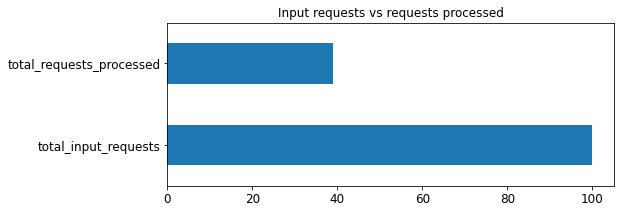

In [47]:
respuestas.plot(kind='barh', title='Input requests vs requests processed', figsize=(8, 3), legend=False, fontsize=12)

De acuerdo a estos datos descibe que de un total de 100 solicitudes de entrada, el sistema tomó 39 solicitudes, lo que representa un 39% de las solicitudes de entrada.

## Solicitudes procesadas exitosamente vs Solicitudes no procesadas

In [90]:
responses_successfully = responses[responses['status'] == True]['id'].unique().size
responses_failed = total_requests_processed - responses_successfully

<AxesSubplot:title={'center':'Succesful vs Fail'}>

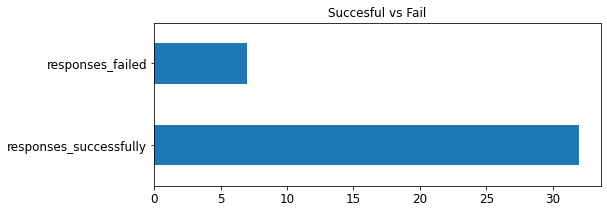

In [91]:
# Graficar los resultados en un grafico de barras horizontal
resultados = pd.DataFrame({ 'total': [responses_successfully, responses_failed] }, index=['responses_successfully', 'responses_failed'])
resultados.plot(kind='barh', title='Succesful vs Fail', figsize=(8, 3), legend=False, fontsize=12)

Deacuerdo a esta grafica, obsevamos que de un total de 39 solicitudes tomadas por el sistema, 32 solicitudes fueron procesadas exitosamente, lo que representa un 82% de las solicitudes tomadas por el sistema.

## Medir los reintentos de las solicitudes

<AxesSubplot:title={'center':'Reintentos'}, ylabel='Frequency'>

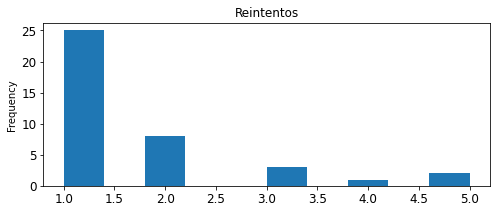

In [95]:
reintentos = responses.groupby('id').size().reset_index(name='reintentos')
reintentos.plot(kind='hist', title='Reintentos', figsize=(8, 3), legend=False, fontsize=12)

Esta grafica nos muestra que de un total de 39 solicitudes tomadas por el sistema, 25 solicitudes no fueron reintentadas (ya si fueron exitosas o no) y 14 solicitudes fueron reintentadas, lo que representa un 36% de las solicitudes tomadas por el sistema,. Al rededor de 7 solicitudes fueron reintentadas por 2 veces y con menos porcentaje estan las solicitudes reintentadas por 4 veces.